# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('network path hidden')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) 
    & (data['total_income'].isna()), 'total_income'] = data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) 
    & (data['days_employed'].isna()), 'days_employed'] = data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
print(*data['purpose'].sort_values().unique(), sep='\n')

автомобили
автомобиль
высшее образование
дополнительное образование
жилье
заняться высшим образованием
заняться образованием
на покупку автомобиля
на покупку подержанного автомобиля
на покупку своего автомобиля
на проведение свадьбы
недвижимость
образование
операции с жильем
операции с коммерческой недвижимостью
операции с недвижимостью
операции со своей недвижимостью
покупка жилой недвижимости
покупка жилья
покупка жилья для сдачи
покупка жилья для семьи
покупка коммерческой недвижимости
покупка недвижимости
покупка своего жилья
получение высшего образования
получение дополнительного образования
получение образования
приобретение автомобиля
профильное образование
ремонт жилью
свадьба
свой автомобиль
сделка с автомобилем
сделка с подержанным автомобилем
строительство жилой недвижимости
строительство недвижимости
строительство собственной недвижимости
сыграть свадьбу


**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Шаг 3. Исследуйте данные и ответьте на вопросы

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# для визуализации
import seaborn

In [23]:
# проведём валидацию достаточности данных для исследования
# на случай, если какие-то категории представлены в недостаточном количестве

# не получается поместить вычисление длины таблицы в f'строку, через переменную - ok
lenght =len(data) 

for i in data['children'].unique():
    var = data[data['children'] == i]['total_income'].count()
    print (f'Заёмщики с количеством детей {i} в выборке {var} человек, что составляет {var / lenght:.2%} от общего числа')

Заёмщики с количеством детей 1 в выборке 4808 человек, что составляет 22.54% от общего числа
Заёмщики с количеством детей 0 в выборке 14091 человек, что составляет 66.06% от общего числа
Заёмщики с количеством детей 3 в выборке 330 человек, что составляет 1.55% от общего числа
Заёмщики с количеством детей 2 в выборке 2052 человек, что составляет 9.62% от общего числа
Заёмщики с количеством детей 4 в выборке 41 человек, что составляет 0.19% от общего числа
Заёмщики с количеством детей 5 в выборке 9 человек, что составляет 0.04% от общего числа


children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

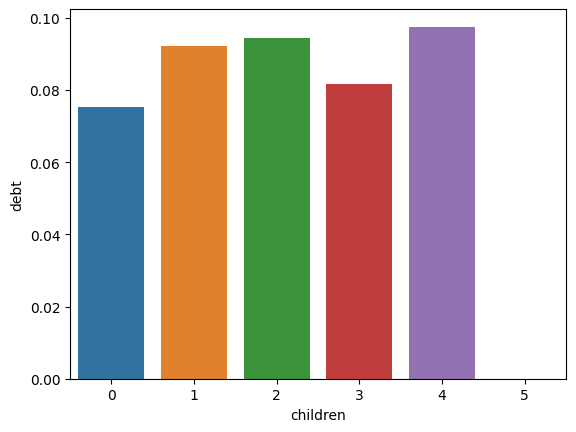

In [24]:
# для оценки зависимости сгруппируем данные по столбцу 'children', анализируемый показатель - среднее значение из столбца debt
children_debt = data.groupby('children')['debt'].mean()

# необязательный, но повышающий наглядность вывод числовых данных
display (children_debt)

# для наглядности построим диаграмму
seaborn.barplot(y = children_debt, x = children_debt.index);

**Вывод** по имеющимся данным:
 - заёмщики, не имеющие детей, реже всех имеют просроченную задолженность (доля просроченных задолженностей 7,5%);
 - менее дисциплинированные заёмщики имеют 1, 2 и 4 ребёнка, причём процент "должников" растёт с увеличением количества детей (от 9,2% до 9,75%);
 - при этом, заёмщики с 3 детьми выпадают из этого правила и показывают результат ниже (8,18%), чем заёмщики с 1,2 и 4 детьми;
 - заёмщики с 5 детьми не имеют просроченной задолженности, т.е., как будто, являются самыми дисциплинированными, но ввиду того, что их количество очень мало (9 из более чем 21000), показатель не является репрезентативным.
 - вообще, количество заёмщиков с числом детей более 2 представлены в выборке крайне незначительно, их доли в общем числе не превышают 1,55%

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status_id,debt,family_status
0,0,0.075606,женат / замужем
1,1,0.093130,гражданский брак
2,2,0.066246,вдовец / вдова
3,3,0.070648,в разводе
4,4,0.097639,Не женат / не замужем


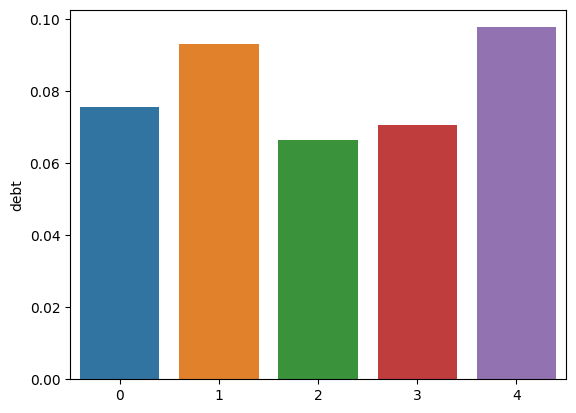

In [25]:
# создадим сводную таблицу для оценки зависимости от семейного положения
data_pivot_fam_stat = data.pivot_table(index=['family_status_id'], values='debt', aggfunc='mean')

# для удобства построения графика отсортируем по id
data_pivot_fam_stat = data_pivot_fam_stat.sort_values(by = 'family_status_id')

# соберём словарик с семейными статусами для использования в сводной таблице и графике
data_fam_dict=data[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop = True)

# склеим сводную таблицу со словарём
data_pivot_fam_stat_full = data_pivot_fam_stat.merge(data_fam_dict, on = 'family_status_id', how = 'left')

# необязательный, но повышающий наглядность вывод числовых данных
display(data_pivot_fam_stat_full)

# строим график
seaborn.barplot(y = data_pivot_fam_stat_full['debt'], x = data_pivot_fam_stat_full.index);

# вся заморочка с merge и словарём нужна, чтобы избежать мультииндекса (по нему не получается строить barplot),
# при этом при выводе числовых данных хотелось сохранить и id, и описание семейного статуса
# можно было столбец со значениями family_status прилепить вручную списком
# но где доказательства, что я не перепутаю при этом id

**Вывод:** 
- наиболее дисциплинированные заёмщики - вдовцы (категория 2 на графике) и разведённые (категория 3), а также женатые (замужние) (категория 0) средняя доля невозвращённых в срок кредитов по этим категориям не превышает 7,56%
- в свою очередь, заёмщики категорий "гражданский брак" (категория 1) или "не женат / не замужем" (категория 4) самые недисциплинированные. Доля невозвращённых кредитов в срок по этим категорями составляет 9,3 - 9,8%

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [26]:
# проведём анализ распределения данных по категориям дохода
# не получается поместить вычисление длины таблицы в f'строку, через переменную - норм

for i in data['total_income_category'].unique():
    var = data[data['total_income_category'] == i]['total_income'].count()
    print (f'Заёмщики с категорией дохода {i} в выборке {var} человек, что составляет {var / lenght:.2%} от общего числа')

Заёмщики с категорией дохода B в выборке 5014 человек, что составляет 23.51% от общего числа
Заёмщики с категорией дохода C в выборке 15921 человек, что составляет 74.64% от общего числа
Заёмщики с категорией дохода D в выборке 349 человек, что составляет 1.64% от общего числа
Заёмщики с категорией дохода E в выборке 22 человек, что составляет 0.10% от общего числа
Заёмщики с категорией дохода A в выборке 25 человек, что составляет 0.12% от общего числа


,debt,income_level
total_income_category,,
A,0.080000,1000001 и выше
B,0.070602,200001–1000000
C,0.084982,50001–200000
D,0.060172,30001–50000
E,0.090909,0–30000


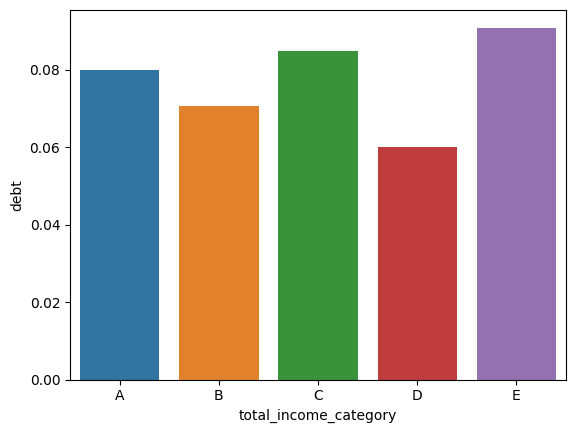

In [27]:
# создадим сводную таблицу для оценки зависимости от уровня дохода
data_pivot_income = data.pivot_table(index=['total_income_category'], values='debt', aggfunc='mean')

# для построения графика отсортируем по категории
data_pivot_income = data_pivot_income.sort_values(by = 'total_income_category')

# добавим столбец с описанием категорий дохода для удобства интерпретации
# здесь столбец приклеиваю вручную, т.к. создавал его сам, значения в таблице отсортированы - ошибка исключена
data_pivot_income['income_level'] = ['1000001 и выше', '200001–1000000', '50001–200000', '30001–50000', '0–30000']

# необязательный, но повышающий наглядность вывод числовых данных
display(data_pivot_income)

# строим график
seaborn.barplot(y = data_pivot_income['debt'], x = data_pivot_income.index);

**Вывод:** 
- прямой зависимости между ростом уровня дохода и долей возвращаемых в срок кредитов нет, при этом в выборке в основном представлена информация по заёмщикам, имеющим категорию дохода C (74,64%) и B (23,51%), т.е. людей среднего и среднего-плюс достатка. По этим двум категориям очевидно, что более богатые (категория B) являются более дисциплинированными заёмщиками.
- наименее дисциплинированными в имеющейся выборке являются заёмщики категории E - люди с самым низким доходом (0 - 30000), доля просроченных кредитов по ним составляет 9,1%;
- заёмщики с категориями A, D, E представлены в выборке крайне незначительно (доля не превышает 1,64%).


Потеряли актуальность выводы:
- наиболее дисциплинированные заёмщики имеют категорию дохода D (30001–50000), доля невозвращаемых в срок кредитов составляет 6,02%
- далее по росту доли просроченных кредитов идут заёщики с категориями доходов B (доля 7,06%), A (доля 8,0%), С (доля 8,5%);


### Как разные цели кредита влияют на его возврат в срок?

,debt,purpose_cat
purpose_category,,
операции с недвижимостью,0.072551,A
проведение свадьбы,0.079118,B
получение образования,0.092528,C
операции с автомобилем,0.093480,D


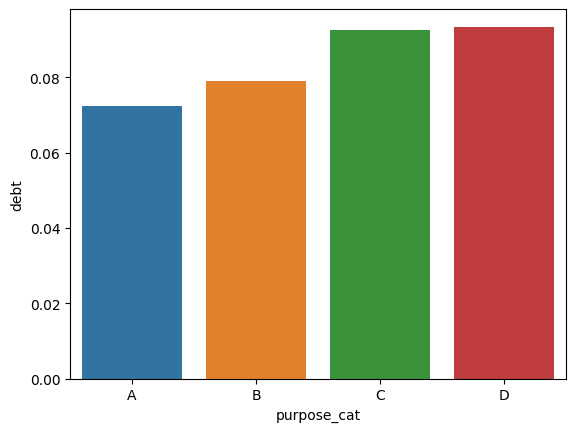

In [28]:
# создадим сводную таблицу для оценки зависимости от целей кредита
data_pivot_purpose = data.pivot_table(index=['purpose_category'], values='debt', aggfunc='mean')

# для красоты построения графика отсортируем по возрастанию доли невозвратов, здесь можно
data_pivot_purpose = data_pivot_purpose.sort_values(by = 'debt')

# добавляю столбец с id категории цели, чтобы на графике читалось и не сливалось в кашу
# буквы добавляю просто по порядку, т.к. никакого смысла они не несут, просто так аккуратней на графике
data_pivot_purpose['purpose_cat'] = ['A','B','C','D']

# необязательный, но повышающий наглядность вывод числовых данных
display(data_pivot_purpose)

# строим график
seaborn.barplot(y = data_pivot_purpose['debt'], x = data_pivot_purpose['purpose_cat']);

**Вывод:** 
- на графике представлены данные по мере роста доли невозвратного кредита в зависимости от цели кредита
- меньше всех доля невозвратных кредитов у цели категории A (операции с недвижимостью) - 7,26%, далее B (свадьба) - 7,91%, С (образование) - 9,25%;
- наибольшая доля невозвратных кредитов с целью категории D на графике (операции с автомобилем) - 9,35%

### Приведите возможные причины появления пропусков в исходных данных.

В исходном датасете отсутствали данные по доходу и по стажу, причём, в одинаковом количестве строк. Можно предположить, что люди не работали официально и не могли подтвердить свой доход.
Кроме того, нельзя исключать техническую ошибку.

### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

На показатель средней арифметической сильно влияют значения-выбросы, которые могут сильно смещать данный показатель в свою сторону. Для многих характеристик это является критичным при составлении оценок (например, средняя зарплата на предприятии, средний возраст сотрудников). Медиана лишена этого недостатка, она позволяет оценить середину выборки, не учитывая "выбросы".

## Шаг 4: общий вывод.

Для исследования были получены исходные данные. В целом, информация была представлена качественная, без существенных пропусков и "выбросов", могущих оказать влияние на выводы. Недостающая информация по доходам была замещена стандартными методами (медианное значение), строки-дубликаты исключены и аномальные значения отброшены.

При проводении исследования все заёмщики были категоризированы в зависимости от целей кредита, семейного положения, дохода. Это позволило работать с группами заёмщиков и выявлять агрегированные зависимости.

После проведения исследования были выяснены зависимости возвратности займов от разных категорий заёмщиков и самих займов (цель займа, доход и семейное положение и количество детей у заёмщика). Обозначены наиболее рискованные категории заёмщиков и, наоборот, самые перспективные.

При этом целью исследования не ставилось выявить наиболее перспективные катогории при разных сочетаниях указанных факторов. Данные выводы возможно использовать для построения скоринговой системы при принятии решения о выдаче кредитов при условии сочетания всех факторов.

Важно отметить, что в исходной выборке не все категории заёмщиков были представлены в достаточном количестве (вероятней всего, по объективным причинам), чтобы на основании этих данных строить скоринговую систему. В крайнем случае, возможно использовать полученные данные с наименьшим приоритетом (весом).